# Second Individual Proyect - Airports


                        Student: Ana María del Cacho Tena

                         Professor: Luciano Gabbanelli

**Work Context**

In this project, we have been working on a project related to airport data. The project involved analyzing a large dataset of airport information around the world (Europe, US, CANADA, South America, Australia, and New Zeeland). We have worked on a geospatial analysis project where we analyzed data on airports around the world. We started by visualizing the top 10 countries with the most airports using a bar chart. Then, we used the Folium library to create a heatmap showing the distribution of airports across these top 10 countries. 

Additionally, we have visualize the flights between different airports in North America and Spain. The main goal of this section was to identify patterns and connections between airports, and to explore the relationship between the location of the airport and the number of flights. In order to do this, we have downloaded another data set with the flights connections. Throughout the project, we used various data analysis tools such as pandas and folium to clean, manipulate and visualize the data.

## Index for the principal and mandatory analyses

1. Download the data from the web
2. Loading of the dataset as a dataframe.
3. Shows the first 10 rows of the dataframe.
4. Get a statistical summary.
5. For this analysis we are not going to use the 'AirportID', 'Latitude', 'Longitude' and 'Altitude' columns, remove them from the dataframe.
6. Get a statistical summary again, how has the data changed?
7. In the statistical summary above it seems that in column TZ there is a rare value \N, check the proportion of them with value_counts.
8. Reload the dataset so that null values are correctly interpreted (repeat section 4, delete columns).
9. Checks the entire dataframe for null values.
10. Overwrites the null values of the IATA and ICAO columns with the value 'UNKNOWN'
11. Changes the type of the DST and TZ variables to categorical.
12. Obtain a statistical summary of the categorical variables.
13. Groups the dataframe by airport type, showing the type count.
14. Select the name of the cities whose airport type is "port"
15. Shows all the rows of the fields name of the airport, name of the country and, name of the city, whose country is Spain.
16. Shows the name of the country and the airport belonging to the city of Madrid and Barcelona. Are all the records from Spain?
17. Save the previous results in a csv called Madrid_Barcelona.csv

In [25]:
## Libraries

import urllib.request as r 
import pandas as pd 
import numpy as np 
import folium

### Download the data from the web

In [26]:

contenido_web= r.urlopen("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat")
texto=contenido_web.read().decode('UTF-8')
header="Airport_Id,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Time_zone,DST,TZ,Type,Source\n"

with open("airport.csv", "w", encoding="utf-8") as file:
    file.write(header)
    file.write(texto)
file.close()


### Loading of the dataset as a dataframe.

In [27]:
df = pd.read_csv('airport.csv')
df.columns

Index(['Airport_Id', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Time_zone', 'DST', 'TZ', 'Type', 'Source'],
      dtype='object')

### Show the first 10 rows of the dataframe.

In [28]:
df.head(10)

,Airport_Id,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Time_zone,DST,TZ,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
5,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports
6,7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3,E,America/Godthab,airport,OurAirports
7,8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3,E,America/Godthab,airport,OurAirports
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3,E,America/Godthab,airport,OurAirports
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4,E,America/Thule,airport,OurAirports


### Get a statistical summary.

In [29]:
df.describe()

,Airport_Id,Latitude,Longitude,Altitude
count,12668.000000,12668.000000,12668.000000,12668.000000
mean,7311.584465,29.820510,-1.041145,831.871093
std,4202.520098,26.923942,83.618663,1498.239733
min,1.000000,-90.000000,-179.876999,-1266.000000
25%,3349.750000,16.115875,-77.294770,38.000000
50%,7771.500000,38.341850,6.955411,232.500000
75%,10943.250000,49.306042,47.835824,883.500000
max,14111.000000,90.000000,179.951004,14472.000000


**Airport_Id**: the Airport_Id variable appears to be a unique identifier for each airport. The fact that the count is the same for all variables suggests that there are no missing values for this particular variable. The *mean* and *Standard deviation (std)* are not very informative in this case, as there is no point in calculating the mean or standard deviation of an identifier. The *minimum (min)* and *maximum (max)* indicate the range of possible values for this variable, which goes from 1 to 14111.

**Latitude and Longitude**: these variables represent the geographical location of each airport. The *mean* suggests that most airports are located near the equator, since the mean latitude is 29.82 degrees. The *std* is relatively high for both variables, indicating that the location of airports varies widely. The *min* and *max* indicate the possible range of values for each variable, ranging from -90 to 90 for latitude and from -179.876999 to 179.951004 for longitude. The percentiles indicate the distribution of the data for each variable: for example, the 25th percentile indicates that 25% of the airports have a latitude less than or equal to 16.115875 degrees.

**Altitude**: this variable represents the elevation of each airport. The *mean* suggests that most airports are at an altitude of about 832 meters above sea level. The *std* is relatively high, indicating that the altitude of airports varies widely. The *min* and *max* indicate the possible range of values for this variable, ranging from -1266 meters to 14472 meters. The percentiles indicate the distribution of the data: for example, the 25th percentile indicates that 25% of the airports are at an altitude of 38 meters or less.

### Remove 'AirportID', 'Latitude', 'Longitude' and 'Altitude' columns.

In [30]:
df.drop(columns=['Airport_Id', 'Latitude','Longitude', 'Altitude'], inplace=True)
df.columns

Index(['Name', 'City', 'Country', 'IATA', 'ICAO', 'Time_zone', 'DST', 'TZ',
       'Type', 'Source'],
      dtype='object')

### Get a statistical summary again, how has the data changed?

In [31]:
df.describe()

,Name,City,Country,IATA,ICAO,Time_zone,DST,TZ,Type,Source
count,12668,12619,12668,12668,12667,12668,12668,12668,12668,12668
unique,12330,9673,241,6925,8161,42,8,312,5,4
top,North Sea,New York,United States,\N,\N,1,E,\N,airport,OurAirports
freq,21,50,2708,5744,4507,2706,3478,4282,8264,7698


**How has the data changed?**

Firstly, the indices of the summary statistics are not the same, since these are not entirely numerical variables, but rather descriptive.

These analyses refer to the statistical information of the data set, which describes characteristics such as the number of non-zero values (count), the number of unique values (unique), the most frequent value (top) and the frequency of the most frequent value (freq) for each column of the data set.

For example, we can see that there are a total of 12,668 airports in the dataset, but only 12,619 have city information, which means that there are 49 airports that do not have city information. We can also see that there are 241 countries represented in the dataset and that the most common country is the United States with 2,708 airports.

### Check proportion of "\N" values in "TZ" column.

In [32]:
prop_NA = df["TZ"].value_counts(normalize=True).get("\\N", 0)
print(f"The proportion of '\\N' values in the 'TZ' column is {prop_NA:.2%}")

The proportion of '\N' values in the 'TZ' column is 33.80%


### Reload dataset and delete columns with null values.

In [33]:
df = pd.read_csv('airport.csv')
df.drop(columns=['Airport_Id', 'Latitude','Longitude', 'Altitude'], inplace=True)
df.dropna(inplace=True)
df.columns

Index(['Name', 'City', 'Country', 'IATA', 'ICAO', 'Time_zone', 'DST', 'TZ',
       'Type', 'Source'],
      dtype='object')

In [34]:
# Replace '\N' values with NaN
df.replace('\\N', np.nan, inplace=True)

### Check the entire dataframe for null values.

In [35]:
print(df.isna().sum())

Name            0
City            0
Country         0
IATA         5734
ICAO         4507
Time_zone     304
DST           304
TZ           4233
Type         1651
Source       1651
dtype: int64


### Overwrite null values of the IATA and ICAO columns with the value 'UNKNOWN'.

In [36]:
df[['IATA', 'ICAO']] = df[['IATA', 'ICAO']].fillna('UNKNOWN')

print(df.IATA)
print(df.ICAO)

0            GKA
1            MAG
2            HGU
3            LAE
4            POM
          ...   
12663    UNKNOWN
12664    UNKNOWN
12665        CPO
12666    UNKNOWN
12667    UNKNOWN
Name: IATA, Length: 12618, dtype: object
0           AYGA
1           AYMD
2           AYMH
3           AYNZ
4           AYPY
          ...   
12663       XIUW
12664       ULLK
12665       SCAT
12666       UKDM
12667    UNKNOWN
Name: ICAO, Length: 12618, dtype: object


### Change the type of the DST and TZ variables to categorical.

In [37]:
df['DST'] = df['DST'].astype('category')
df['TZ'] = df['TZ'].astype('category')

print(df.DST)
print(df.Time_zone)

0          U
1          U
2          U
3          U
4          U
        ... 
12663    NaN
12664    NaN
12665    NaN
12666    NaN
12667      A
Name: DST, Length: 12618, dtype: category
Categories (7, object): ['A', 'E', 'N', 'O', 'S', 'U', 'Z']
0         10
1         10
2         10
3         10
4         10
        ... 
12663    NaN
12664    NaN
12665    NaN
12666    NaN
12667     -5
Name: Time_zone, Length: 12618, dtype: object


### Obtain a statistical summary of the categorical variables.

In [38]:
print(df[['DST', 'TZ']].describe())

          DST                TZ
count   12314              8385
unique      7               311
top         E  America/New_York
freq     3478               705


**Statistical Summary**

This analysis indicates that there are 12,314 airports in the dataset that have information on the DST (Daylight Saving Time) variable, while there are only 8,385 airports that have information on the TZ (Data_Base_time_zone) variable.

As for the DST variable, there are 7 unique values, suggesting that the variable is categorical. The most common value is "E", which may refer to the Eastern European time zone. We can also see that the value "E" appears most frequently in the dataset (3478 times).

As for the TZ variable, we can see that there are 311 unique values. The most common value is "America/New_York", suggesting that many of the airports in the dataset are located in North America. We can also see that the value "America/New_York" appears most frequently in the dataset (705 times).

### Group the dataframe by airport type, showing the type count.

In [39]:
df.groupby('Type').size()

Type
airport    8215
port        101
station    1332
unknown    1319
dtype: int64

### Select the name of the cities whose airport type is "port".

In [40]:
print(df.loc[df['Type'] == 'port', 'City'].unique())

['Macau' 'Stockholm' 'Helsingborg' 'Helsinki' 'Sakaiminato' 'Hong Kong'
 'Calais' 'Dover' 'Cape May NJ' 'Lewes DE' 'Bar Harbor ME' 'Yarmouth NS'
 'St. Ignace MI' 'Shenzhen' 'Zhuhai' 'Miyajima' 'Brown Bluff'
 'Devil Island' 'Gourdin Island' 'Cuverville Island' 'Labadee' 'Whittier'
 'Nuernberg' 'Costa maya' 'Rodby' 'Stranraer' 'Dieppe' 'Newhaven'
 'Falmouth' 'Cozumel' 'Philipsburg' 'Basseterre' 'Charlotte Amalie'
 'San Juan' 'Mormugao' 'Cochin' 'Salem' 'Severobajkalsk' 'Kendall'
 "St. George's" 'Cruz Bay' 'Red Hook' 'Anacortes' 'Friday Harbor' 'Valdez'
 'Bainbridge Island' 'Algerciras' 'Milan' 'Port Jefferson' 'Bridgeport'
 'Turin' 'Stykkisholmur' 'Kotor' 'Key West' 'Tau' 'Stavanger' 'Halhjem'
 'Sandviksvag' 'Arsvagen' 'Mortavika' 'Verona' 'Cheboygan'
 'Bois Blanc Island' 'St Ignace ' 'Toulon' 'Harpers Ferry' 'Auckland'
 'Bridgetown' 'Orient' 'Holyhead' 'Singapore' 'Batam' 'Kowloon'
 'Horseshoe Bay' 'Prince Rupert' 'Port Hardy' 'Nanaimo' 'Saint Johns'
 'Pointe-a-Pitre' 'Scarborough' 'Wil

### Show all the rows of the fields name of the airport, name of the country and name of the city, whose country is Spain.

In [41]:
df.loc[df['Country'] == 'Spain', ['Name', 'Country', 'City']]

,Name,Country,City
1030,Fuerteventura Airport,Spain,Fuerteventura
1031,Hierro Airport,Spain,Hierro
1032,La Palma Airport,Spain,Santa Cruz De La Palma
1033,Gran Canaria Airport,Spain,Gran Canaria
1034,Lanzarote Airport,Spain,Arrecife
...,...,...,...
11437,Madrid Estacion Sur,Spain,Madrid
11438,Granada Bus Station,Spain,Granada
11879,Palma de Mallorca Cruise Terminal,Spain,Palma de Mallorca
12234,Algeciras Heliport,Spain,Algeciras


### Show the name of the country and the airport belonging to the city of Madrid and Barcelona. Are all the records from Spain?

In [42]:
df_mb = df.loc[(df['City'] == 'Madrid') | (df['City'] == 'Barcelona'), ['Country', 'Name']]
print(df_mb)
df_mb['Country'].unique()

         Country                                               Name
1188       Spain                    Barcelona International Airport
1194       Spain                                    Getafe Air Base
1198       Spain               Adolfo Suárez Madrid–Barajas Airport
1214       Spain                                   Torrejón Airport
1217       Spain                                     Cuatro Vientos
2690   Venezuela  General José Antonio Anzoategui International ...
6302       Spain                          Barcelona Cruise Terminal
8046       Spain                                             Atocha
8053       Spain                                  Chamartin Station
8055       Spain                                           Aeroport
8056       Spain                                  Passeig de Gracia
8057       Spain                                              Sants
8846       Spain                                    Barajas Station
9156       Spain                         Aeropue

array(['Spain', 'Venezuela'], dtype=object)

As can be seen, not all airports are Spanish. There is one in Venezuela, because the city is called "Barcelona", the same as in Spain.

### Save the previous results in a csv called Madrid_Barcelona.csv

In [43]:
df_mb.to_csv('Madrid_Barcelona.csv', index=False)

## Project - Extra Analyses

 1. Replace values NaN and NaN by null values (NaN)
 2. Top 10 countries with the most airports
    * 2.1. Heat-Map for the top 10 countries with the most airports
 

In [44]:
contenido_web= r.urlopen("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat")
texto=contenido_web.read().decode('UTF-8')
header="Airport_Id,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Time_zone,DST,TZ,Type,Source\n"

with open("airport.csv", "w", encoding="utf-8") as file:
    file.write(header)
    file.write(texto)
file.close()


In [45]:
df = pd.read_csv('airport.csv')
df.columns

Index(['Airport_Id', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Time_zone', 'DST', 'TZ', 'Type', 'Source'],
      dtype='object')

### Replace values NaN and NaN by null values (NaN)

In [46]:
# Replace values NaN and NaN by null values (NaN)
df.replace(['\\N', np.nan], np.nan, inplace=True)

# Delete rows containing null values
df.dropna(inplace=True)

# Delete rows containing negative values and Convert text strings to integers
df['TZ'] = df['TZ'].apply(lambda x: int(x) if str(x).isdigit() else x)

### Top 10 countries with the most airports

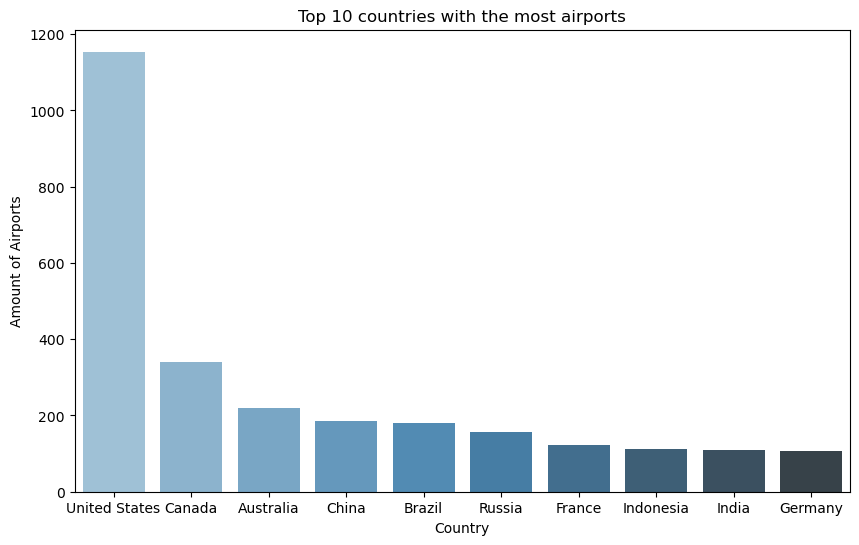

In [47]:
## Data Visualization.

"""
We create visualizations to better understand the data. 
In this case, we are going to see which are the top 10 countries
with the most airports in the world according to our "df" database. 
For this, using libraries such as Matplotlib and Seaborn. 
"""

import matplotlib.pyplot as plt
import seaborn as sns


# Obtain the number of airports per country
airport_counts = df['Country'].value_counts()

# Sort the dataframe in descending order and select the top 10 countries
top_10_countries = airport_counts.sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='Blues_d')
plt.title('Top 10 countries with the most airports')
plt.xlabel('Country')
plt.ylabel('Amount of Airports')
plt.show()


#### Heat-Map for the top 10 countries with the most airports

In [68]:
## Hotmap

import pandas as pd
import plotly.express as px

"""
We create a new dataframe with the mean latitude, longitude, 
and count of airports per country. 
We will use that in order to create the heatmap using plotly

"""


# select top 10 countries with the most airports
#top_countries = df['Country'].value_counts().nlargest(10).index.tolist()

# create a new dataframe with the mean latitude, longitude, and count of airports per country
heatmap_data = pd.DataFrame(columns=['lat', 'lon', 'count'])

for country in top_10_countries.index:
    country_airports = df[df['Country'] == country]
    heatmap_data = pd.concat([heatmap_data, pd.DataFrame({'lat': [country_airports['Latitude'].mean()],
                                                          'lon': [country_airports['Longitude'].mean()],
                                                          'count': [top_10_countries[country]]})])

    
# create the heatmap using plotly
fig = px.density_mapbox(heatmap_data, lat='lat', lon='lon', z='count', radius=20, color_continuous_midpoint=1000,
                        center=dict(lat=0, lon=180), range_color = (0,2800),zoom=0, mapbox_style="stamen-terrain")
fig.show()



This heat-map represents the 10 countries with the most airports in a geolocalized way. It can be seen that the information represented in this map is consistent with the previous bar chart. The map can be zoomed in and out at will, and are represented with different intensity of purple, each of the 10 countries with more airports in the world. 

## Project - Accurated Analyses between countries

1. Download the data from the web (ROUTES)
2. Delete non-useful columns
3. Database only for United States and Spain
    * 3.1. To merge both databases by 'IATA' and 'Source_airport'
    * 3.2. To merge both databases by 'Source_Destination' and 'IATA'
4. Which is the most popular route?
5. Flights United States - Spain
    * 5.1. Flights New York - Spain


### Download the data from the web (ROUTES)

In [49]:
content_web_routes= r.urlopen("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
text1=content_web_routes.read().decode('UTF-8')
header1="Airline,Airline_ID,Source_airport,Source_AirportID,Destination_airport,Destination_airportID,Codeshare,Stops,Equipment\n"

"""
In order to carry out more extensive analyses, 
we have decided to download the "routes" database from the project website. 

These analyses consist of studying and evaluating the air routes without stopovers 
between the United States and Spain (more specifically, between New York and Spain), and 
the most popular route. 
For this purpose, we have cleaned and matched the data. 
"""

with open("routes.csv", "w", encoding="utf-8") as file:
    file.write(header1)
    file.write(text1)
file.close()

In [50]:
import pandas as pd 

# Loading dataset
routes_df = pd.read_csv('routes.csv')
routes_df.columns

Index(['Airline', 'Airline_ID', 'Source_airport', 'Source_AirportID',
       'Destination_airport', 'Destination_airportID', 'Codeshare', 'Stops',
       'Equipment'],
      dtype='object')

In [51]:
routes_df

,Airline,Airline_ID,Source_airport,Source_AirportID,Destination_airport,Destination_airportID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


### Delete non-useful columns

In [52]:
routes_df.drop(['Airline_ID', 'Source_AirportID','Destination_airportID', 'Codeshare'], 
               axis=1, inplace = True)

In [53]:
routes_df

,Airline,Source_airport,Destination_airport,Stops,Equipment
0,2B,AER,KZN,0,CR2
1,2B,ASF,KZN,0,CR2
2,2B,ASF,MRV,0,CR2
3,2B,CEK,KZN,0,CR2
4,2B,CEK,OVB,0,CR2
...,...,...,...,...,...
67658,ZL,WYA,ADL,0,SF3
67659,ZM,DME,FRU,0,734
67660,ZM,FRU,DME,0,734
67661,ZM,FRU,OSS,0,734


### Database only for United States and Spain

In [54]:
# Select the column that identifies the country of each record
country_column = 'Country'

# Filter the records from the original database to include only those from United States and Spain
df_NoAm = df.loc[df[country_column].isin(['Spain', 'United States'])]

# Save the new DataSet in a CSV
df_NoAm.to_csv('df_Spain_UnitedStates.csv', index=False)


#### To merge both databases by 'IATA' and 'Source_airport'

In [55]:
NoAm_flights = pd.merge(df_NoAm, routes_df, left_on='IATA', right_on='Source_airport')

In [56]:
NoAm_flights

,Airport_Id,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Time_zone,DST,TZ,Type,Source,Airline,Source_airport,Destination_airport,Stops,Equipment
0,1051,Fuerteventura Airport,Fuerteventura,Spain,FUE,GCFV,28.4527,-13.863800,85,0,E,Atlantic/Canary,airport,OurAirports,AB,FUE,CGN,0,738
1,1051,Fuerteventura Airport,Fuerteventura,Spain,FUE,GCFV,28.4527,-13.863800,85,0,E,Atlantic/Canary,airport,OurAirports,AB,FUE,DUS,0,738 332 321
2,1051,Fuerteventura Airport,Fuerteventura,Spain,FUE,GCFV,28.4527,-13.863800,85,0,E,Atlantic/Canary,airport,OurAirports,AB,FUE,HAM,0,738
3,1051,Fuerteventura Airport,Fuerteventura,Spain,FUE,GCFV,28.4527,-13.863800,85,0,E,Atlantic/Canary,airport,OurAirports,AB,FUE,LEJ,0,738
4,1051,Fuerteventura Airport,Fuerteventura,Spain,FUE,GCFV,28.4527,-13.863800,85,0,E,Atlantic/Canary,airport,OurAirports,AB,FUE,MUC,0,738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15642,8314,Hilton Head Airport,Hilton Head Island,United States,HHH,KHXD,32.2244,-80.697502,19,-5,A,America/New_York,airport,OurAirports,US,HHH,CLT,0,DH8
15643,8314,Hilton Head Airport,Hilton Head Island,United States,HHH,KHXD,32.2244,-80.697502,19,-5,A,America/New_York,airport,OurAirports,US,HHH,DCA,0,DH8
15644,9543,Ogden Hinckley Airport,Ogden,United States,OGD,KOGD,41.1959,-112.012001,4473,-7,A,America/Denver,airport,OurAirports,G4,OGD,AZA,0,319
15645,9739,Napakiak Airport,Napakiak,United States,WNA,PANA,60.6903,-161.979004,17,-9,A,America/Anchorage,airport,OurAirports,4Y,WNA,PKA,0,CNA


#### To merge both databases by 'Destination_airport' and 'IATA'

In [57]:
NoAm_flights_internal = pd.merge(NoAm_flights, df_NoAm, 
                                 left_on='Destination_airport', right_on='IATA', 
                                 suffixes=['_Source', '_Destination'])


In [58]:
NoAm_flights_internal

,Airport_Id_Source,Name_Source,City_Source,Country_Source,IATA_Source,ICAO_Source,Latitude_Source,Longitude_Source,Altitude_Source,Time_zone_Source,...,IATA_Destination,ICAO_Destination,Latitude_Destination,Longitude_Destination,Altitude_Destination,Time_zone_Destination,DST_Destination,TZ_Destination,Type_Destination,Source_Destination
0,1051,Fuerteventura Airport,Fuerteventura,Spain,FUE,GCFV,28.452700,-13.863800,85,0,...,BCN,LEBL,41.297100,2.078460,12,1,E,Europe/Madrid,airport,OurAirports
1,1051,Fuerteventura Airport,Fuerteventura,Spain,FUE,GCFV,28.452700,-13.863800,85,0,...,BCN,LEBL,41.297100,2.078460,12,1,E,Europe/Madrid,airport,OurAirports
2,1051,Fuerteventura Airport,Fuerteventura,Spain,FUE,GCFV,28.452700,-13.863800,85,0,...,BCN,LEBL,41.297100,2.078460,12,1,E,Europe/Madrid,airport,OurAirports
3,1054,Gran Canaria Airport,Gran Canaria,Spain,LPA,GCLP,27.931900,-15.386600,78,0,...,BCN,LEBL,41.297100,2.078460,12,1,E,Europe/Madrid,airport,OurAirports
4,1054,Gran Canaria Airport,Gran Canaria,Spain,LPA,GCLP,27.931900,-15.386600,78,0,...,BCN,LEBL,41.297100,2.078460,12,1,E,Europe/Madrid,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,7159,South Naknek Nr 2 Airport,South Naknek,United States,WSN,PFWS,58.703400,-157.007996,162,-9,...,EGX,PAII,58.185501,-157.375000,92,-9,A,America/Anchorage,airport,OurAirports
11231,7162,Larsen Bay Airport,Larsen Bay,United States,KLN,PALB,57.535099,-153.977997,87,-9,...,KYK,PAKY,57.567101,-154.449997,137,-9,A,America/Anchorage,airport,OurAirports
11232,7206,Quinhagak Airport,Quinhagak,United States,KWN,PAQH,59.755100,-161.845000,42,-9,...,TOG,PATG,59.052799,-160.397003,21,-9,A,America/Anchorage,airport,OurAirports
11233,8200,Toksook Bay Airport,Toksook Bay,United States,OOK,PAOO,60.541401,-165.087006,59,-9,...,MYU,PAMY,60.371399,-166.270996,48,-9,A,America/Anchorage,airport,OurAirports


In [59]:
NoAm_flights_internal.columns

Index(['Airport_Id_Source', 'Name_Source', 'City_Source', 'Country_Source',
       'IATA_Source', 'ICAO_Source', 'Latitude_Source', 'Longitude_Source',
       'Altitude_Source', 'Time_zone_Source', 'DST_Source', 'TZ_Source',
       'Type_Source', 'Source_Source', 'Airline', 'Source_airport',
       'Destination_airport', 'Stops', 'Equipment', 'Airport_Id_Destination',
       'Name_Destination', 'City_Destination', 'Country_Destination',
       'IATA_Destination', 'ICAO_Destination', 'Latitude_Destination',
       'Longitude_Destination', 'Altitude_Destination',
       'Time_zone_Destination', 'DST_Destination', 'TZ_Destination',
       'Type_Destination', 'Source_Destination'],
      dtype='object')

### Which is the most popular route?

In [60]:
# Grouping flights by route and counting frequency
ruta_counts = NoAm_flights_internal.groupby(['City_Source', 'City_Destination']).size().reset_index(name='Frequency')

# Found the most popular route
most_popular_route = ruta_counts.loc[ruta_counts['Frequency'].idxmax()]

# Print the results
print('The most popular route is from {} to {}, with {} flights.'.format(most_popular_route['City_Source'], most_popular_route['City_Destination'], most_popular_route['Frequency']))


The most popular route is from Chicago to Atlanta, with 25 flights.


### Flights United States - Spain

In [61]:
# Filter flights to or from Washington, D.C.
washington_flights = NoAm_flights_internal[(NoAm_flights_internal['City_Source'] == 'Washington') | (NoAm_flights_internal['City_Destination'] == 'Washington')]

# Filter flights originating or terminating in Spain
spain_flights = NoAm_flights_internal[(NoAm_flights_internal['Country_Source'] == 'Spain') | (NoAm_flights_internal['Country_Destination'] == 'Spain')]

# Filter flights between Washington and Spain
washington_spain_flights = NoAm_flights_internal[(NoAm_flights_internal['Country_Source'] == 'United States') & (NoAm_flights_internal['Country_Destination'] == 'Spain')]

# Create a map centered on Washington and Spain
mapa = folium.Map(location=[38.9072, -77.0369], zoom_start=2)

# Adding markers for origin and destination airports
for index, row in washington_spain_flights.iterrows():
    origen = (row['Latitude_Source'], row['Longitude_Source'])
    destino = (row['Latitude_Destination'], row['Longitude_Destination'])
    folium.Marker(location=origen, icon=folium.Icon(color='red')).add_to(mapa)
    folium.Marker(location=destino, icon=folium.Icon(color='green')).add_to(mapa)

# Adding lines between origin and destination airports
for index, row in washington_spain_flights.iterrows():
    origen = (row['Latitude_Source'], row['Longitude_Source'])
    destino = (row['Latitude_Destination'], row['Longitude_Destination'])
    folium.PolyLine(locations=[origen, destino], color='black', weight=2).add_to(mapa)

# Show the map
mapa


All U.S. airports seem to be connected to only two Spanish cities: Madrid and Barcelona, in spite of all the network of airports that Spain has (see cell above). This may be due to the fact that they are the cities with more commerce and work, as well as being very well connected to the rest of the country (including the Islands).

##### Geospatial Analysis of Spain.

In [62]:
## Geospatial Analysis of Spain.

"""
We performed a geospatial analysis using libraries such as
Geopandas and Folium. This includes the creation of interactive maps 
and visualization of location data on a map.
"""

import geopandas as gpd
import folium

# Create a map centered on the coordinates of Spain.
m = folium.Map(location=[40.4168, -3.7038], zoom_start=6)


# Adding markers for each airport in the DataFrame
for index, row in df[df[df.columns[3]].str.upper()=="SPAIN"].iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)

# Show the map
m

#### Flights Nueva York - España

In [64]:
# Filter flights from New York to Spain
df_newyork_spain = NoAm_flights_internal[(NoAm_flights_internal['City_Source'] == 'New York') & (NoAm_flights_internal['Country_Destination'] == 'Spain')]

# Create a map centered on New York
mapa = folium.Map(location=[40.7128, -74.0060], zoom_start=4)

# Adding airport markers for origin and destination airports of flights
for i, row in df_newyork_spain.iterrows():
    origen = [row['Latitude_Source'], row['Longitude_Source']]
    destino = [row['Latitude_Destination'], row['Longitude_Destination']]
    folium.Marker(location=origen, icon=folium.Icon(color='red')).add_to(mapa)
    folium.Marker(location=destino, icon=folium.Icon(color='green')).add_to(mapa)
    folium.PolyLine(locations=[origen, destino], color="black", weight=2.5, opacity=1).add_to(mapa)

# Show the map
mapa


Consistent with the above analysis, New York City also appears to have these two unique connections. However, what happens when the destinations are reversed, i.e., Spain-New York?

##### Flights from Spain to NY

In [65]:
# Filter flights from Spain to NY
df_spain_newyork = NoAm_flights_internal[(NoAm_flights_internal['Country_Source'] == 'Spain') & (NoAm_flights_internal['City_Destination'] == 'New York')]

# Create a map centered on New York
mapa = folium.Map(location=[40.7128, -74.0060], zoom_start=4)

# Adding airport markers for origin and destination airports of flights
for i, row in df_spain_newyork.iterrows():
    origen = [row['Latitude_Source'], row['Longitude_Source']]
    destino = [row['Latitude_Destination'], row['Longitude_Destination']]
    folium.Marker(location=origen, icon=folium.Icon(color='green')).add_to(mapa)
    folium.Marker(location=destino, icon=folium.Icon(color='red')).add_to(mapa)
    folium.PolyLine(locations=[origen, destino], color="black", weight=2.5, opacity=1).add_to(mapa)

# Show the map
mapa

It is exactly the same, so the paths are reciprocal (New York - Spain // Spain - New York). The next cell show also the the paths between USA (in general) and Spain are the same.

##### Flight from Spain to USA

In [66]:
# Filter flights from Spain to USA
df_spain_usa = NoAm_flights_internal[(NoAm_flights_internal['Country_Source'] == 'Spain') & (NoAm_flights_internal['Country_Destination'] == 'United States')]

# Create a map centered on New York
mapa = folium.Map(location=[40.7128, -74.0060], zoom_start=4)

# Adding airport markers for origin and destination airports of flights
for i, row in df_spain_usa.iterrows():
    origen = [row['Latitude_Source'], row['Longitude_Source']]
    destino = [row['Latitude_Destination'], row['Longitude_Destination']]
    folium.Marker(location=origen, icon=folium.Icon(color='green')).add_to(mapa)
    folium.Marker(location=destino, icon=folium.Icon(color='red')).add_to(mapa)
    folium.PolyLine(locations=[origen, destino], color="black", weight=2.5, opacity=1).add_to(mapa)

# Show the map
mapa

## References

1. Content Resources (Numpy & Pandas)
2. Python String replace () Mathod [https://www.w3schools.com/python/ref_string_replace.asp]
3. Pandas tutorial [https://www.w3schools.com/python/pandas/default.asp]
4. Folium Python [https://realpython.com/python-folium-web-maps-from-data/]
5. Geopandas Python [https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/] y [https://www.youtube.com/watch?v=mmBkZIkliMA]
6. Red de Aeropuertos españoles [https://www.aena.es/es/pasajeros/nuestros-aeropuertos.html]

## IMPORTANT WARNING!!!

In [67]:
from IPython.display import HTML

HTML('<img src="https://media.giphy.com/media/l3Uct2K9N3CqxeCoU/giphy.gif">')
